# AIML 302 Part 6 - Exercises with Results

## Exercise 1

#### Task 1 
##### Load libraries that are used in this module.

#### Result:

In [1]:
# Helper packages.
import os 
import pickle
import pandas as pd
import numpy as np
# Cosine similarity and clustering packages.
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram, fcluster
from gensim import matutils
# Network creation and visualization.
import networkx as nx
from pyvis.network import Network
# Other plotting tools.
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

/Users/datasociety/opt/anaconda3/envs/iqvia-auto-text-analyses-using-nlp/lib/python3.7/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


#### Task 2 
##### Set `data_dir` to the data directory.

#### Result:

In [2]:
data_dir = "/home/jovyan/iqvia-aiml-302/data"


##### Task 3
##### Load the pickled file from the previous exercises: 

##### 'similarity_ex.sav'
##### 'similarity_df_ex.sav'
##### 'doc_topic_df_ex.sav'
##### 'ex_word_counts_array.sav' - save this as `word_counts_array_ex`




#### Result:

In [4]:
similarity_ex = pickle.load(open(data_dir + '/similarity_ex.sav', 'rb'))
similarity_df_ex = pickle.load(open(data_dir + '/similarity_df_ex.sav', 'rb'))
word_counts_array_ex = pickle.load(open(data_dir + '/ex_wc_array.sav', 'rb'))
doc_topic_df_ex = pickle.load(open(data_dir + '/doc_topic_df_ex.sav', 'rb'))

UN = pd.read_csv(data_dir + '/UN_agreement_titles.csv')


#### Task 4
##### Compute a graph from similarity object `similarity_df_ex`.
##### Convert the graph into a dataframe in the form of a edgelist called `edgelist_df_ex`.
##### Print the shape of `edgelist_df_ex`.

#### Result:

In [5]:
# Create a graph object from the similarity matrix.
graph = nx.from_pandas_adjacency(similarity_df_ex)

# Convert it to a dataframe in a form of an edgelist.
edgelist_df_ex = nx.to_pandas_edgelist(graph)

# Take a look at the data frame of edges.
print(edgelist_df_ex.head())

   source  target    weight
0       0       0  1.000000
1       0       1  0.005251
2       0       2  0.004498
3       0       4  0.050002
4       0       6  0.041843


In [6]:
print(edgelist_df_ex.shape)

(150421, 3)


#### Task 5
##### Create a cosine similarity score distribution by plotting the weights of edges .
##### Filter out all pairs of documents with weights below 0.4 and above 0.8.
##### Print the head and shape of the new `edgelist_df_ex`.

#### Result:

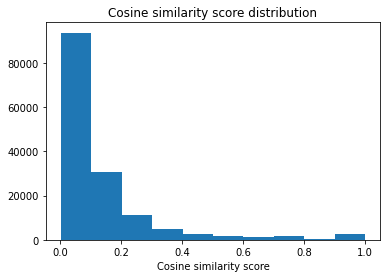

In [7]:
# Result:
# Plot the weights of edges (i.e. similarity scores).
plt.hist(edgelist_df_ex['weight'])
plt.xlabel('Cosine similarity score')
plt.title('Cosine similarity score distribution')
plt.show()

In [8]:
# Filter out all entries below 0.4 and above 0.8.
edgelist_df_ex = edgelist_df_ex.query('weight>0.4 and weight<0.8')

# Take a look at the dataframe of edges.
print(edgelist_df_ex.head())

     source  target    weight
89        0     371  0.507907
121       0     629  0.749898
159       0     545  0.447521
215       0     962  0.441454
291       0     963  0.461282


In [9]:
print(edgelist_df_ex.shape)

(6808, 3)


#### Task 6
##### Create an empty network object `network_ex` with the following base parameters:
    - height - 100%
    - width - 60%
    - bgcolor - FFFFFF
    - font_color - 000000

#### Result:

In [10]:
# Create an empty network object.
network_ex = Network(height = "100%",
                     width = "60%",
                     bgcolor = "#FFFFFF",
                     font_color = "#000000")

# Set the physics layout of the network.
network_ex.force_atlas_2based()
network_ex.set_edge_smooth('dynamic')
print(network_ex)

{
    "Nodes": [],
    "Edges": [],
    "Height": "100%",
    "Width": "60%",
    "Heading": ""
}


#### Task 7
##### Populate the empty network with edge and node data. 
##### Use `edgelift_df_ex` and zip the three necessary columns - source, target, and weight - into an iterable set of tuples.
##### Print network nodes and network edges of your choice.

#### Result:

In [11]:
# Zip columns of edgelist data into a set of tuples.
edge_data = zip(edgelist_df_ex['source'], edgelist_df_ex['target'], edgelist_df_ex['weight'])
# Iterate through the edge data.
for e in edge_data:
    src = e[0] #<- get the source node
    dst = e[1] #<- get the destination (i.e. target node)
    w = e[2] #<- get the weight of the edge
# Add a source node with its information.
    network_ex.add_node(src, src, title = src)
# Add a destination node with its information.
    network_ex.add_node(dst, dst, title = dst)
# Add an edge between source and destination nodes with weight w.
    network_ex.add_edge(src, dst, value = w)

In [12]:
print(network_ex.nodes[0:5])
print(network_ex.edges[0:5])
print(network_ex.shape)

[{'title': 0, 'id': 0, 'label': 0, 'shape': 'dot', 'font': {'color': '#000000'}}, {'title': 371, 'id': 371, 'label': 371, 'shape': 'dot', 'font': {'color': '#000000'}}, {'title': 629, 'id': 629, 'label': 629, 'shape': 'dot', 'font': {'color': '#000000'}}, {'title': 545, 'id': 545, 'label': 545, 'shape': 'dot', 'font': {'color': '#000000'}}, {'title': 962, 'id': 962, 'label': 962, 'shape': 'dot', 'font': {'color': '#000000'}}]
[{'value': 0.5079074501991272, 'from': 0, 'to': 371}, {'value': 0.7498978972434998, 'from': 0, 'to': 629}, {'value': 0.4475210905075073, 'from': 0, 'to': 545}, {'value': 0.4414542317390442, 'from': 0, 'to': 962}, {'value': 0.4612824618816376, 'from': 0, 'to': 963}]
dot


#### Task 8
##### Get the neighbor map for each node.
##### Print the document IDs that are most similar to document 25.

#### Result:

In [13]:
# Get a list of node neighbors.
neighbor_map = network_ex.get_adj_list()

# Show documents most similar to document 25.
print(neighbor_map[25])

{6, 262, 263, 265, 650, 266, 652, 418, 678, 38, 40, 686, 307, 196, 197, 841, 208, 727, 216, 729, 87, 987, 988, 606, 607}


#### Task 9
##### Add the neighbor node information into the hover over tooltip.
##### Print information of the node 5.
##### Save the network graph as `UN_similar_snippets` to data_dir and show it in browser.

#### Result:

In [14]:
# Add neighbor data to node hover data.
for node in network_ex.nodes:
    title = "Most similar articles: <br>"
    neighbors = list(neighbor_map[node["id"]])
    title = title + "<br>".join(str(neighbor) for neighbor in neighbors)
    node["title"] = title

print(network_ex.nodes[5])

{'title': 'Most similar articles: <br>0<br>461<br>371<br>629', 'id': 963, 'label': 963, 'shape': 'dot', 'font': {'color': '#000000'}}


In [15]:
# Save html and show graph in browser.
network_ex.show(data_dir + "/UN_similar_snippets.html")

#### Task 10
##### Hover over a node of your choice to see the list of all its neighbors. For example, node 924 is used below.
##### Print the articles from the edgelist `edgelist_df_ex` with their weights.
##### Look up the articles closest to the node and print them.
##### Modify the graph appearance by using `physics` parameter and re-save the graph.
##### Optional: Try using `nodes` and `edges` parameter to change the appearance of the graph.

#### Result:

In [16]:
edgelist_df_subset_ex = edgelist_df_ex.query("source==924")
print(edgelist_df_subset_ex)

       source  target    weight
38175     924     328  0.431977
38188     924     343  0.725497
38192     924     228  0.555718
38197     924     476  0.469448
38199     924     206  0.701738
38204     924     342  0.770073
38216     924     156  0.779695
38218     924     331  0.711194
38226     924     340  0.730165
38240     924     441  0.731021
38242     924     747  0.530426
38264     924     333  0.539450
38278     924     329  0.659959
38282     924     938  0.687824
38287     924     154  0.725909
38310     924     171  0.547735
38328     924     851  0.435744
38336     924     915  0.589818
38337     924     914  0.772151
38359     924     356  0.510096
38370     924     750  0.426115
38379     924     267  0.477598


In [17]:
print(edgelist_df_subset_ex)

       source  target    weight
38175     924     328  0.431977
38188     924     343  0.725497
38192     924     228  0.555718
38197     924     476  0.469448
38199     924     206  0.701738
38204     924     342  0.770073
38216     924     156  0.779695
38218     924     331  0.711194
38226     924     340  0.730165
38240     924     441  0.731021
38242     924     747  0.530426
38264     924     333  0.539450
38278     924     329  0.659959
38282     924     938  0.687824
38287     924     154  0.725909
38310     924     171  0.547735
38328     924     851  0.435744
38336     924     915  0.589818
38337     924     914  0.772151
38359     924     356  0.510096
38370     924     750  0.426115
38379     924     267  0.477598


In [18]:
print(UN.iloc[924, 0])

Development Credit Agreement--Education Project (with annexed General Conditions Applicable to Development Credit Agreements). 


In [19]:
print(UN.iloc[450, 0])

Development Credit Agreement--Highway Engineering Project (with annexed General Conditions Applicable to Development Credit Agreements). 


In [20]:
print(UN.iloc[914, 0])
# We can see that these 3 articles are similar, because their snippets all start and end the same way: Development Credit Agreement...

Development Credit Agreement--Highway Maintenance Project (with annexed General Conditions Applicable to Development Credit Agreements). 


In [21]:
# Show buttons to modify the look.
network_ex.show_buttons(filter_=['physics'])

In [22]:
# Save html and show graph in browser.
network_ex.show(data_dir+"/UN_similar_snippets.html")

## Exercise 2

#### Task 1 
##### Compute the distance matrix `distance_ex` from `similarity_ex`.
##### Create the linkage matrix based on `distance_ex` and print the first 10 rows.
##### Print the shape of the matrix and the first 4 links.
##### Print the 110th link. Which clusters are linked? What is the distance between them? How many observations are there in the new cluster?


#### Result:

In [23]:
# Compute distance matrix by subtracting similarity from 1.
distance_ex = 1 - similarity_ex

# Define the `linkage_matrix` using `ward` clustering algorithm.
linkage_matrix_ex = ward(distance_ex)
print(linkage_matrix_ex[0:10])

# Print shape of the matrix.
print(linkage_matrix_ex.shape)
    
print(linkage_matrix_ex[0:4])

#Print the 110th link in the matrix.
print(linkage_matrix_ex[109])

[[  7.   9.   0.   2.]
 [ 77.  81.   0.   2.]
 [ 94. 943.   0.   3.]
 [475. 604.   0.   2.]
 [622. 945.   0.   3.]
 [626. 946.   0.   4.]
 [627. 947.   0.   5.]
 [463. 467.   0.   2.]
 [222. 355.   0.   2.]
 [385. 388.   0.   2.]]
(941, 4)
[[  7.   9.   0.   2.]
 [ 77.  81.   0.   2.]
 [ 94. 943.   0.   3.]
 [475. 604.   0.   2.]]
[886. 887.   0.   2.]


#### Task 2 
##### Visualize the hierarchical clusters with right orientation and leaf font size 14. Set figsize to (15, 40).
##### Remove titles with less than 3 words and save it as `valid_snippets_ex`.


#### Results:

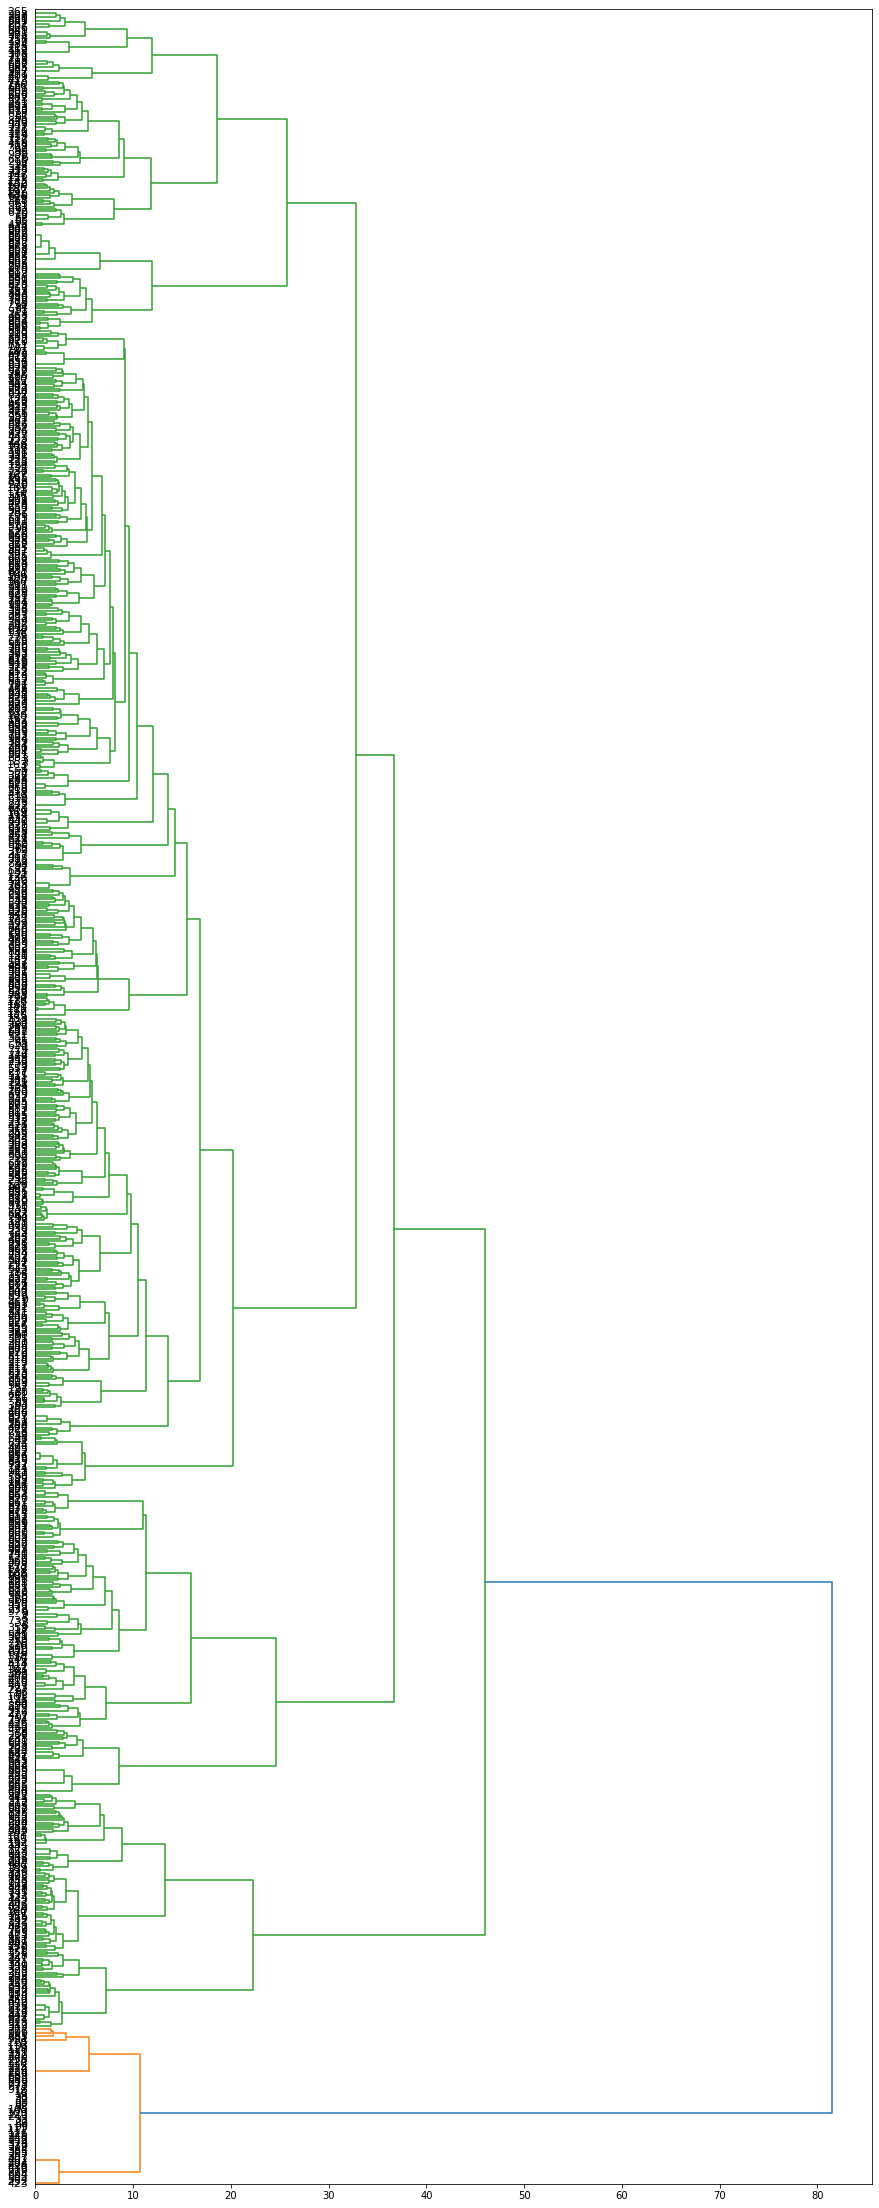

In [24]:
# Find indices of articles that we kept
valid_snippets_ex = np.where(word_counts_array_ex >= 3)[0]

# Now we can plot the hierarchical clusters.
fig, axes = plt.subplots(figsize = (15, 40))
axes = dendrogram(linkage_matrix_ex,
                  orientation = "right",
                  labels=[str(i) for i in valid_snippets_ex],
                  leaf_font_size = 11)

#### Task 3
##### Split the dendrogram based on maximum clusters. Set the maximum number of clusters named `k` as 3.

#### Result:

In [25]:
# Set k - the max number of clusters.
k = 3

# Get cluster labels for each snippet.
cluster_labels = fcluster(linkage_matrix_ex, #<- linkage matrix
                          k, #<- max number of clusters
                          criterion = 'maxclust') #<- criterion maxclust
print(cluster_labels)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 3 3 3 1 3 1 3 3 1 3 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 1 1 3 1 1 3 1 3 3 3 1 3 3 3 1 3 3 3 1 1 1 1 3 3 3 3 1 1
 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 2 2 2
 3 2 2 2 3 3 3 3 3 3 3 3 3 3 2 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 3 3 3 3 2 3 2 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 3 1 3 3 3 3 1 1
 3 1 3 3 3 3 3 1 3 2 1 3 1 1 3 1 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 2 3 3 3
 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 2
 3 3 3 3 3 3 3 3 3 3 3 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 1 3 3 1 1 3 3 3 1 1 3 3 3 3 3 1
 3 3 3 1 1 1 3 3 3 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3
 3 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3
 3 3 3 3 3 3 3 3 1 3 3 3 

#### Task 4 
##### Create variable with valid snippets of `UN` and name as ` UN_valid_articles`.
##### Add `cluster_labels` to `UN_valid_articles` and name the column as `hclust_label`.
##### Sort `doc_topic_df_ex` by `doc_id` and save.
##### Add a column called `LDA_topic_label` to `UN_valid_articles` from `best_topic` in `doc_topic_df_ex`.
##### Save the plot and the data in png and csv format respectively.

#### Result:

In [26]:
UN_valid_articles = UN.loc[valid_snippets_ex]
UN_valid_articles['hclust_label'] = cluster_labels
doc_topic_df_ex = doc_topic_df_ex.sort_values(by = "doc_id")
UN_valid_articles['LDA_topic_label'] = doc_topic_df_ex['best_topic']

fig.savefig(data_dir + '/UN_hclust.png')
UN_valid_articles.to_csv(data_dir + '/UN_snippets_with_cluster_labels.csv')